In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

In [4]:
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/mahesh/anaconda3/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(X_train.astype(np.float32), y_train.astype(np.float32), epochs = 5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6514 - loss: 13.8631 - val_accuracy: 0.6855 - val_loss: 0.8967
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7268 - loss: 0.7988 - val_accuracy: 0.7608 - val_loss: 0.7039
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7665 - loss: 0.6487 - val_accuracy: 0.7722 - val_loss: 0.6363
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7937 - loss: 0.5787 - val_accuracy: 0.8023 - val_loss: 0.5607
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8102 - loss: 0.5294 - val_accuracy: 0.8231 - val_loss: 0.5077


In [12]:
acc,loss = model.evaluate(X_test,y_test)
print(acc)
print(loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.8229 - loss: 0.5147
0.5319758057594299
0.817300021648407


In [13]:
def check_label(id_,labels):
    label = y_train[id_]
    if label not in labels:
        plt.imshow(X_train[id_])
        print(label)
        plt.show()
    return label

9


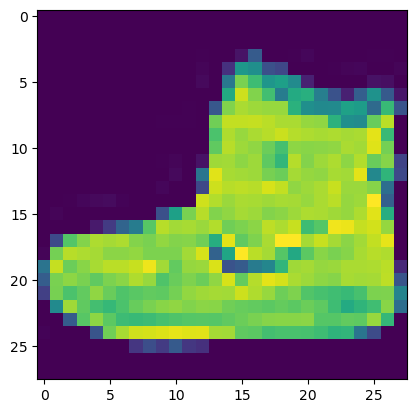

0


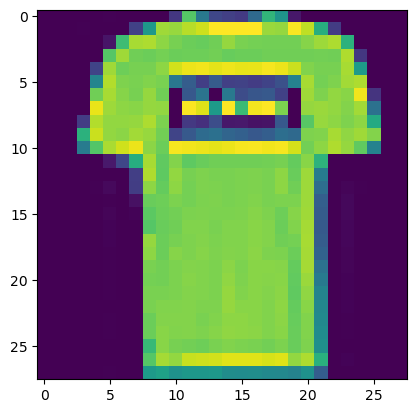

3


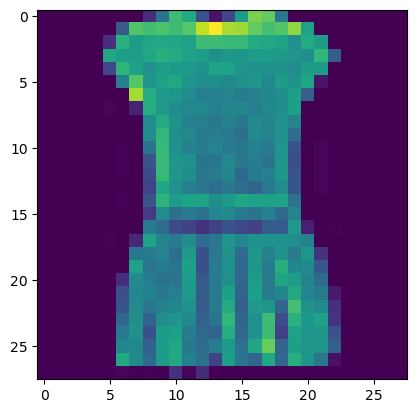

2


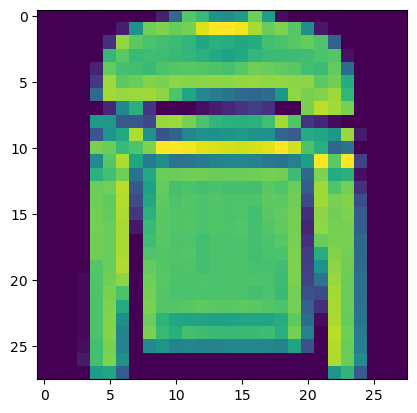

7


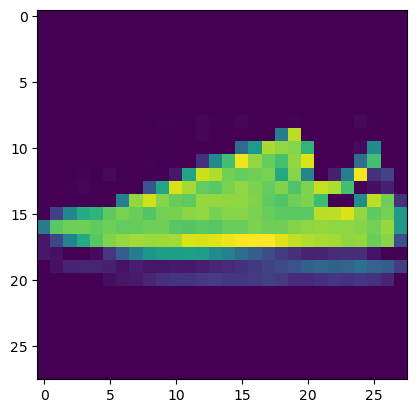

5


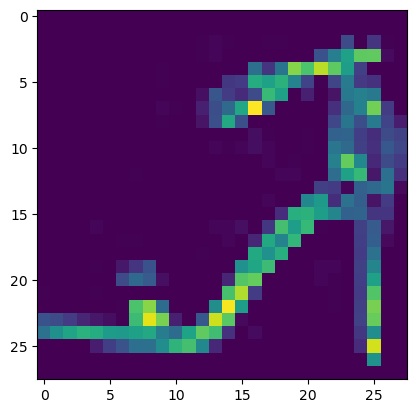

1


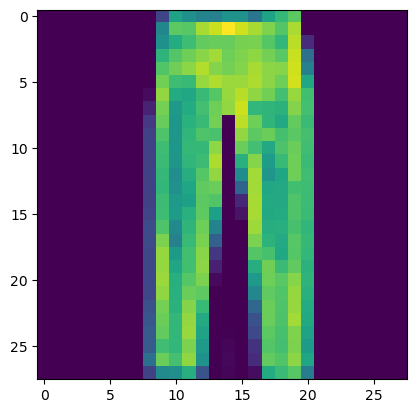

6


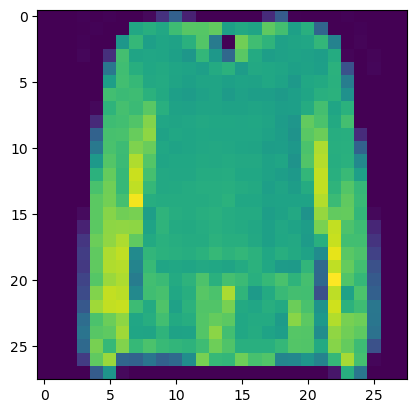

4


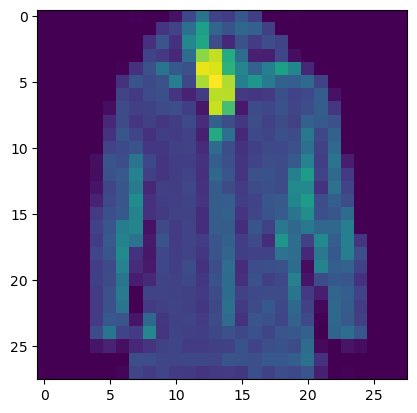

8


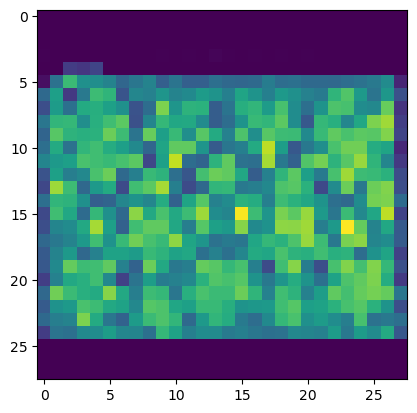

In [14]:
labels = []
i = 0
while len(labels) < 10:
    label = check_label(i,labels)
    if label not in labels:
        labels.append(label)
    i+=1

In [15]:
def predict(id_):
    labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']
    prediction = model.predict(X_test[id_:id_+1])
    label = labels[np.argmax(prediction)]
    plt.imshow(X_test[id_])
    print(label)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
trouser


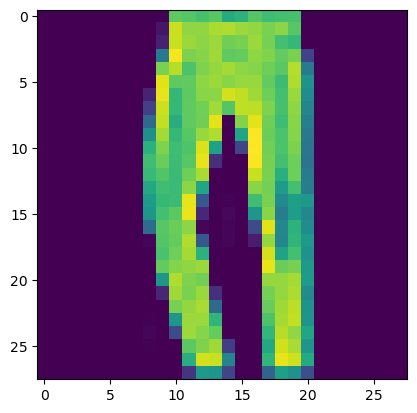

In [16]:
predict(5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
pullover


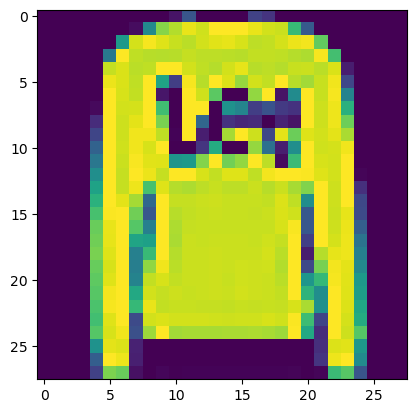

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
trouser


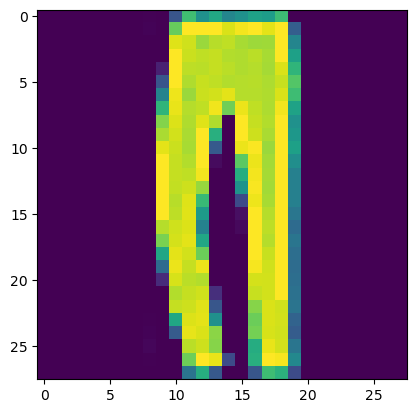

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
trouser


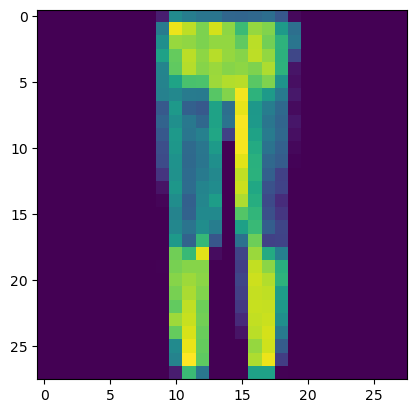

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
shirt


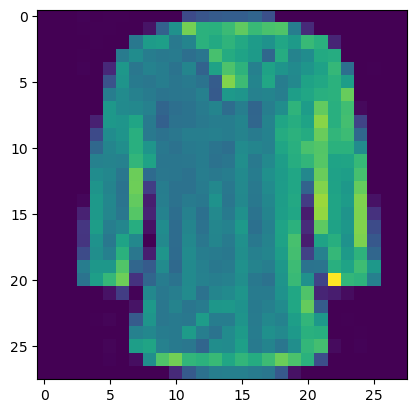

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
trouser


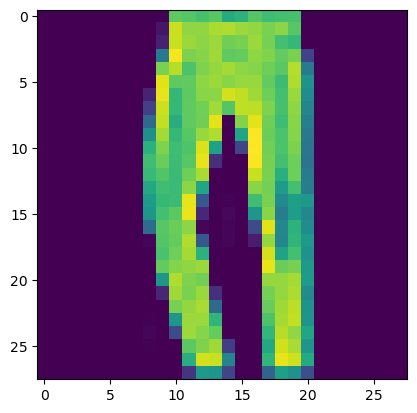

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
coat


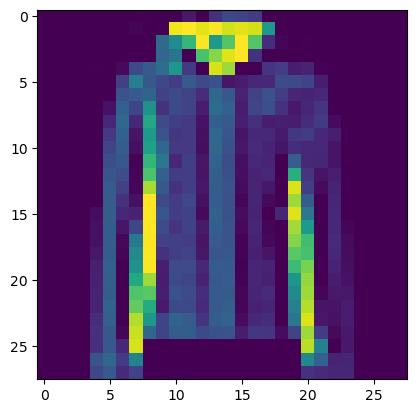

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
shirt


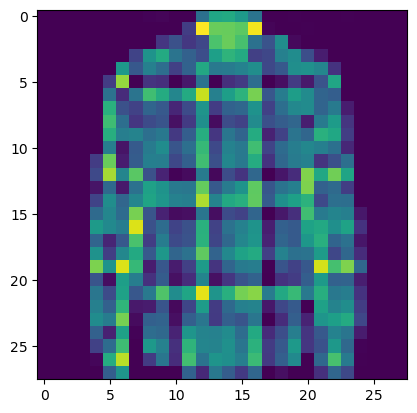

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
sandal


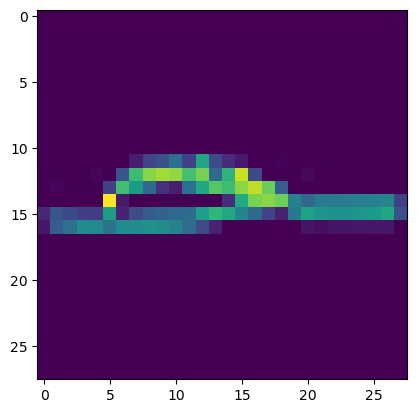

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
sneaker


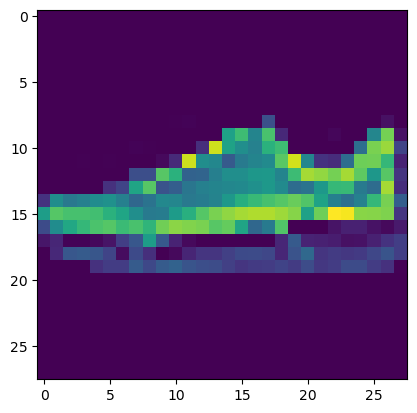

In [17]:
for i in range (1,10):
    predict(i)